In [68]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [69]:
t1 = pd.read_csv('./Scores/score_true_1.csv')
t2 = pd.read_csv('./Scores/score_true_2.csv')
t3 = pd.read_csv('./Scores/score_true_3.csv')
t4 = pd.read_csv('./Scores/score_true_4.csv')
t5 = pd.read_csv('./Scores/score_true_5.csv')

In [70]:
t = t1.append(t2, ignore_index=True)
t = t.append(t3, ignore_index=True)
t = t.append(t4, ignore_index=True)
t = t.append(t5, ignore_index=True)

In [71]:
f1 = pd.read_csv('./Scores/score_fake_1.csv')
f2 = pd.read_csv('./Scores/score_fake_2.csv')
f3 = pd.read_csv('./Scores/score_fake_3.csv')
f4 = pd.read_csv('./Scores/score_fake_4.csv')
f5 = pd.read_csv('./Scores/score_fake_5_final.csv')

In [72]:
f = f1.append(f2, ignore_index=True)
f = f.append(f3, ignore_index=True)
f = f.append(f4, ignore_index=True)
f = f.append(f5, ignore_index=True)

In [73]:
t

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
0,72.727273,0.727273,0.953870
1,36.363636,0.363636,0.774581
2,63.636364,0.636364,0.784848
3,35.714286,0.357143,0.656921
4,50.000000,0.500000,0.835293
...,...,...,...
491,50.000000,0.500000,0.862707
492,50.000000,0.500000,0.914262
493,50.000000,0.500000,0.962881
494,50.000000,0.500000,0.759484


In [74]:
f

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
0,7.692308,0.076923,0.466115
1,0.000000,0.000000,0.473237
2,11.111111,0.111111,0.431902
3,0.000000,0.000000,0.458282
4,0.000000,0.052632,0.428630
...,...,...,...
435,18.181818,0.181818,0.551623
436,0.000000,0.000000,0.569780
437,0.000000,0.000000,0.386376
438,0.000000,0.000000,0.446706


In [75]:
f[:100].describe()

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
count,100.000000,100.000000,100.000000
mean,6.287560,0.083885,0.491505
std,9.184170,0.107337,0.091844
min,0.000000,0.000000,0.252077
25%,0.000000,0.000000,0.434090
50%,0.000000,0.064583,0.483122
75%,10.131579,0.125000,0.540091
max,38.461538,0.461538,0.760253


In [76]:
t[:100].describe()

,metric1_score_true,sentence_bleu_score_true,sbertSimilarity_score_true
count,100.000000,100.000000,100.000000
mean,57.567910,0.580606,0.836687
std,21.206250,0.209736,0.120010
min,0.000000,0.000000,0.406675
25%,46.153846,0.471930,0.783584
50%,57.738095,0.577381,0.845073
75%,66.666667,0.673077,0.922729
max,100.000000,1.000000,1.000000


In [77]:
label = []
gt = []
thresh = 0.65
for idx in range(len(t)):
    gt.append(1)
#     print(t['sbertSimilarity_score_true'][idx])
    if t['sbertSimilarity_score_true'][idx] > thresh:
        label.append(1)
    else:
        label.append(0)

In [78]:
for idx in range(len(f)):
    gt.append(0)
#     print(f['sbertSimilarity_score_true'][idx])
    if f['sbertSimilarity_score_true'][idx] > thresh:
        label.append(1)
    else:
        label.append(0)

In [79]:
len(label), len(gt)

(936, 936)

In [80]:
sum(label), sum(gt)

(488, 496)

In [81]:
import matplotlib.pyplot as plt
import numpy as np

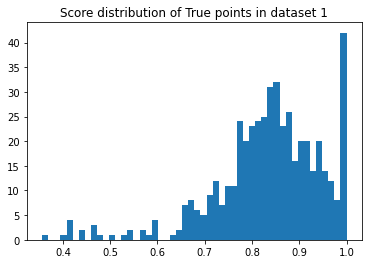

In [82]:
plt.hist(t['sbertSimilarity_score_true'], bins=50)
plt.savefig('true_plot.pdf')
plt.title("Score distribution of True points in dataset 1")
plt.show()

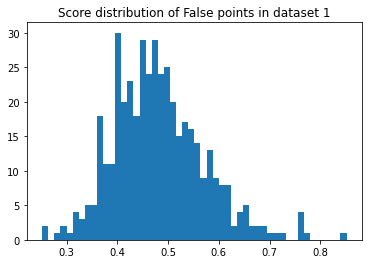

In [83]:
plt.hist(f['sbertSimilarity_score_true'], bins=50)
plt.savefig('false_plot.pdf')
plt.title("Score distribution of False points in dataset 1")
plt.show()

# Dataset 2

In [53]:
test1 = pd.read_csv('./Scores/score_test_part_1.csv')
test2 = pd.read_csv('./Scores/score_test_part_2.csv')
test3 = pd.read_csv('./Scores/score_test_3.csv')

In [54]:
test3.rename(columns = {'Label':'label'}, inplace = True)


In [55]:
test = test1.append(test2, ignore_index=True)
test = test.append(test3, ignore_index=True)

In [56]:
sum(test['sbertSimilarity_score'] == -1)

15

In [57]:
test = test[test['sbertSimilarity_score'] != -1].reset_index()
test

,index,metric1_score,sentence_bleu_score,sbertSimilarity_score,label
0,0,11.111111,0.111111,0.464764,0
1,1,0.000000,0.000000,0.448631,0
2,2,14.285714,0.214286,0.478942,0
3,3,0.000000,0.000000,0.520089,0
4,4,0.000000,0.000000,0.468685,0
...,...,...,...,...,...
376,391,0.000000,0.000000,0.566354,0
377,392,0.000000,0.000000,0.521470,0
378,393,41.666667,0.416667,0.741199,0
379,394,0.000000,0.000000,0.469852,1


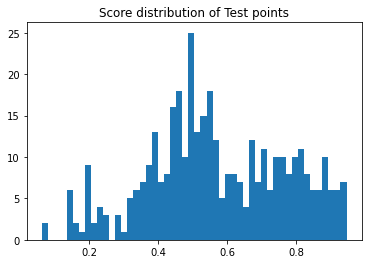

In [58]:
plt.hist(test['sbertSimilarity_score'], bins=50)
# plt.savefig('true_plot.pdf')
plt.title("Score distribution of Test points")
plt.show()

In [59]:
label2 = []
thresh = 0.65
for idx in range(len(test)):
#     print(t['sbertSimilarity_score_true'][idx])
    if test['sbertSimilarity_score'][idx] > thresh:
        label2.append(1)
    else:
        label2.append(0)

In [60]:
label2.extend(label)
gt2 = list(test['label'])
gt2.extend(gt)

In [61]:
accuracy_score(gt2, label2), f1_score(gt2, label2)

(0.9012908124525436, 0.8998459167950693)

In [63]:
true_test = test[test['label'] == 1].reset_index()
fake_test =  test[test['label'] == 0].reset_index()

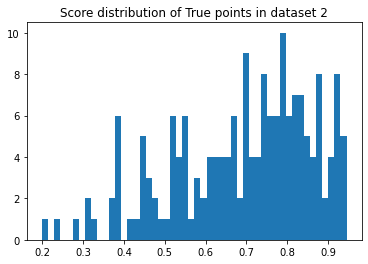

In [64]:
plt.hist(true_test['sbertSimilarity_score'], bins=50)
plt.savefig('true_plot.pdf')
plt.title("Score distribution of True points in dataset 2")
plt.show()

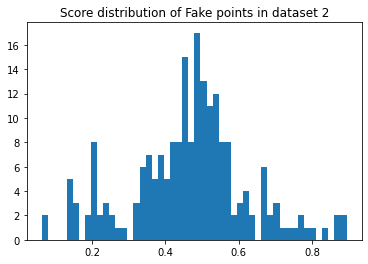

In [84]:
plt.hist(fake_test['sbertSimilarity_score'], bins=50)
plt.savefig('true_plot.pdf')
plt.title("Score distribution of Fake points in dataset 2")
plt.show()

In [175]:
true_test.describe()

,level_0,index,metric1_score,sentence_bleu_score,sbertSimilarity_score,label
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.0
mean,186.135593,197.435028,34.367686,0.351219,0.691661,1.0
std,104.272282,108.285384,25.197585,0.250825,0.171974,0.0
min,5.000000,5.000000,0.000000,0.000000,0.199771,1.0
25%,97.000000,104.000000,6.250000,0.111111,0.560879,1.0
50%,172.000000,185.000000,38.461538,0.400000,0.727630,1.0
75%,275.000000,290.000000,50.000000,0.533333,0.820945,1.0
max,379.000000,394.000000,85.714286,0.857143,0.945091,1.0


In [176]:
fake_test.describe()

,level_0,index,metric1_score,sentence_bleu_score,sbertSimilarity_score,label
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,193.352941,204.500000,4.161889,0.045053,0.465361,0.0
std,115.120339,119.799607,12.111985,0.124372,0.158824,0.0
min,0.000000,0.000000,0.000000,0.000000,0.064030,0.0
25%,92.250000,99.250000,0.000000,0.000000,0.382203,0.0
50%,202.500000,217.500000,0.000000,0.000000,0.481062,0.0
75%,293.500000,308.500000,0.000000,0.000000,0.543538,0.0
max,380.000000,395.000000,80.000000,0.800000,0.893425,0.0
